# Herkenning van handgeschreven cijfers met Deep Learning 1

## Neurale Netwerken

- Minor AAI Hogeschool van Amsterdam
- Docenten: Michiel Bontenbal & Maarten POst
- Vrijdag 16 februari 2024
- Acknowledgments: Stijn Oomes

### To do:
- Run het notebook
- Upload het notebook naar je Gitlab & maak aantekening in je logboek. Werk eventueel je bloom-tabel bij.

## Importeer libraries

In [2]:
# Import libraries. Ignore possible tensorflow warnings.
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from keras import models, layers, datasets
from keras.layers import Dense

## Verover de data

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [6]:
train_labels.shape

(60000,)

## Prepareer de images

In [7]:
train_data = train_images.reshape((60000,28*28))

In [8]:
train_data.shape

(60000, 784)

In [9]:
train_data_floats = train_data.astype('float32')/255

In [10]:
train_data_floats.min()

0.0

In [11]:
train_data_floats.max()

1.0

In [12]:
test_data = test_images.reshape((10000,28*28))
test_data_floats = test_data.astype('float32')/255

In [13]:
test_data.shape

(10000, 784)

In [14]:
test_data_floats.max()

1.0

## Prepareer de labels

In [15]:
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

In [16]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [17]:
train_labels_encoded[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## Opdracht 1: 

We nemen hier het model over uit het filmpje van '3 blue 1 brown'. Bestudeer het filmpje en neem de parameters over in je het script hieronder

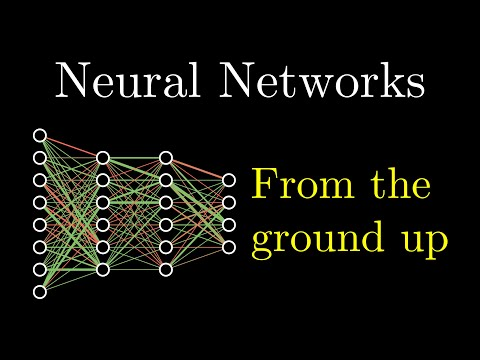

In [18]:
#BEGIN MET KIJKEN OP t = 3.30. Je mag stoppen op 5.35.
import IPython
IPython.display.YouTubeVideo('aircAruvnKk')

In [19]:
#OEFENING: VERVANG DE VRAAGTEKENS. GEBRUIK HET FILMPJE ALS INPUT.
model = models.Sequential()

#Hidden layer
model.add(layers.Dense(16 ,activation = 'relu'))

#Hidden layer 2
model.add(layers.Dense(16,activation = 'relu'))

#Output layer
model.add(layers.Dense(10,activation = 'softmax'))

Hier gebruiken we 16 neuronen in de hidden layers, dit getal is abitrair en kan van alles zijn. De laatste output layer heeft wel een betekenisvolle hoeveelheid neuronen, namelijk 10. Dit zijn alle mogelijk heden die uit het model kunnen komen, de cijfers 0 - 9, dus 10 neuronen.

In [20]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
#Voordat je gaat compileren bestudeer onderstaand plaatje.
import IPython
IPython.display.Image(url='https://drek4537l1klr.cloudfront.net/chollet2/Figures/01-09.png')

In [ ]:
#compileer het model met onderstaande parameters
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_data_floats,
    train_labels_encoded,
    epochs = 10,
    batch_size = 128,
    validation_data = (test_data_floats, test_labels_encoded)
)

Epoch 1/10
469/469 [==============================] - 2s 2ms/step - loss: 0.6720 - accuracy: 0.8048 - val_loss: 0.3102 - val_accuracy: 0.9143
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2886 - accuracy: 0.9176 - val_loss: 0.2689 - val_accuracy: 0.9242
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2518 - accuracy: 0.9279 - val_loss: 0.2428 - val_accuracy: 0.9295
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2236 - accuracy: 0.9354 - val_loss: 0.2190 - val_accuracy: 0.9371
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2027 - accuracy: 0.9425 - val_loss: 0.2012 - val_accuracy: 0.9444
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1893 - accuracy: 0.9465 - val_loss: 0.1923 - val_accuracy: 0.9464
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1801 - accuracy: 0.9485 - val_loss: 0.1871 - val_accuracy: 0.9477
Epoch 

In [ ]:
test_loss, test_acc =model.evaluate(test_data_floats, test_labels_encoded)

print(test_acc)

313/313 [==============================] - 0s 482us/step - loss: 0.1734 - accuracy: 0.9488
0.9488000273704529


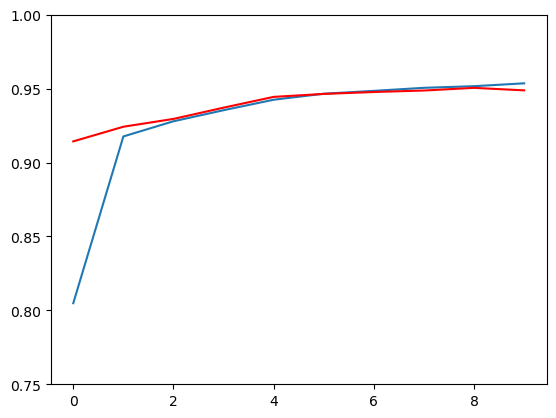

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r')
plt.ylim(0.75,1.0)
plt.show()

## Oefening 2. Verander de parameters van het model van opdracht 1 en kijk of je de accuracy kunt verbeteren.

In [ ]:
from keras.optimizers.legacy import Adam

# New model
model = models.Sequential()
model.add(layers.Dense(28*28,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

# Compile the model
model.compile(
    Adam(learning_rate=0.01),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# Train the model
history = model.fit(
    train_data_floats,
    train_labels_encoded,
    epochs = 20,
    batch_size = 256,
    validation_data = (test_data_floats, test_labels_encoded)
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data_floats, test_labels_encoded)
print("Accuracy of NN:", test_acc)

Epoch 1/20
235/235 [==============================] - 2s 6ms/step - loss: 0.5130 - accuracy: 0.8400 - val_loss: 0.1852 - val_accuracy: 0.9469
Epoch 2/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1507 - accuracy: 0.9566 - val_loss: 0.1273 - val_accuracy: 0.9618
Epoch 3/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0965 - accuracy: 0.9715 - val_loss: 0.1222 - val_accuracy: 0.9653
Epoch 4/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0784 - accuracy: 0.9765 - val_loss: 0.1148 - val_accuracy: 0.9686
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0660 - accuracy: 0.9806 - val_loss: 0.1069 - val_accuracy: 0.9719
Epoch 6/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0508 - accuracy: 0.9845 - val_loss: 0.1220 - val_accuracy: 0.9711
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0496 - accuracy: 0.9852 - val_loss: 0.1029 - val_accuracy: 0.9735
Ep

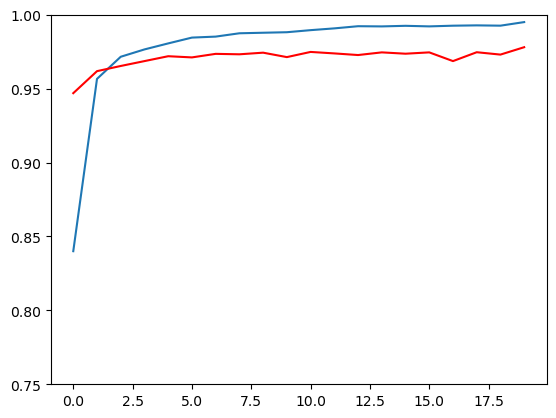

In [ ]:
# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r')
plt.ylim(0.75,1.0)
plt.show()

Ik heb het aantal epochs en batch size omhoog gedaan van 10 naar 20 epochs en van 128 naar 256 batchsize. Ook heb ik een input layer toegevoegd met 28*28 neuronen, dit is gelijk aan de input pixels. 
Dit heeft de accuracy met zo'n ±3% omhoog gebracht.

### To do: Upload je notebook naar Gitlab en werk je logbook / bloom tabel bij.